## Setup

In [63]:
import pandas as pd
import numpy as np

####  Dataset from: https://www.kaggle.com/c/ieee-fraud-detection

In [64]:
raw_df = pd.read_csv("./ieee-fraud-detection/train_identity.csv")

In [65]:
raw_df.shape

(144233, 41)

In [66]:
trans_df = pd.read_csv("./ieee-fraud-detection/train_transaction.csv")

In [67]:
trans_df.shape

(590540, 394)

In [68]:
print(trans_df)

        TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400          68.500         W   
1             2987001        0          86401          29.000         W   
2             2987002        0          86469          59.000         W   
3             2987003        0          86499          50.000         W   
4             2987004        0          86506          50.000         H   
5             2987005        0          86510          49.000         W   
6             2987006        0          86522         159.000         W   
7             2987007        0          86529         422.500         W   
8             2987008        0          86535          15.000         H   
9             2987009        0          86536         117.000         W   
10            2987010        0          86549          75.887         C   
11            2987011        0          86555          16.495         C   
12            2987012    

In [69]:
print(trans_df.describe())

       TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000    

In [70]:
train_full_df = pd.merge(trans_df, raw_df, on='TransactionID', how='left')

In [71]:
train_full_df.shape

(590540, 434)

In [72]:
len(train_full_df[train_full_df["isFraud"]==1])/len(train_full_df)*100

3.4990009144173126

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

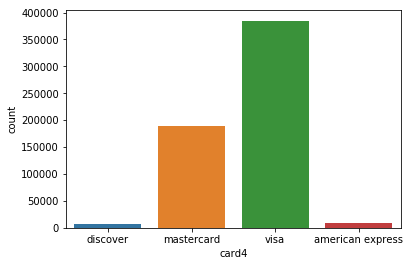

In [74]:
sns.countplot(train_full_df['card4'])

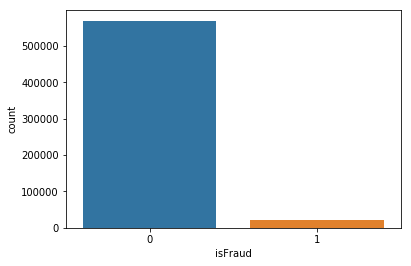

In [75]:
sns.countplot(train_full_df['isFraud'])

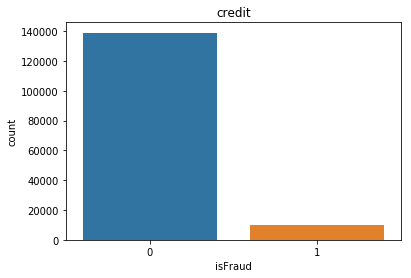

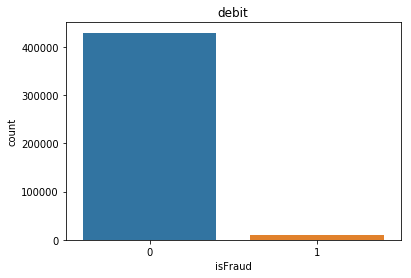

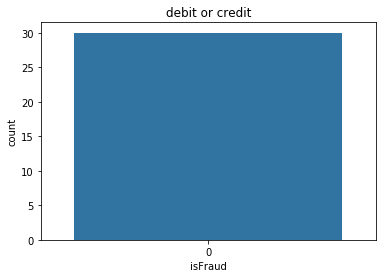

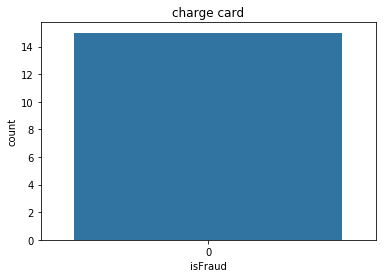

In [76]:
cardTypes = ['credit','debit','debit or credit','charge card']
for i,i_card in enumerate(cardTypes):
    cardData = eval('train_full_df.loc[train_full_df["card6"]=="'+i_card+'"]')
    plt.figure(i)
    sns.countplot(cardData['isFraud']).set_title(i_card)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

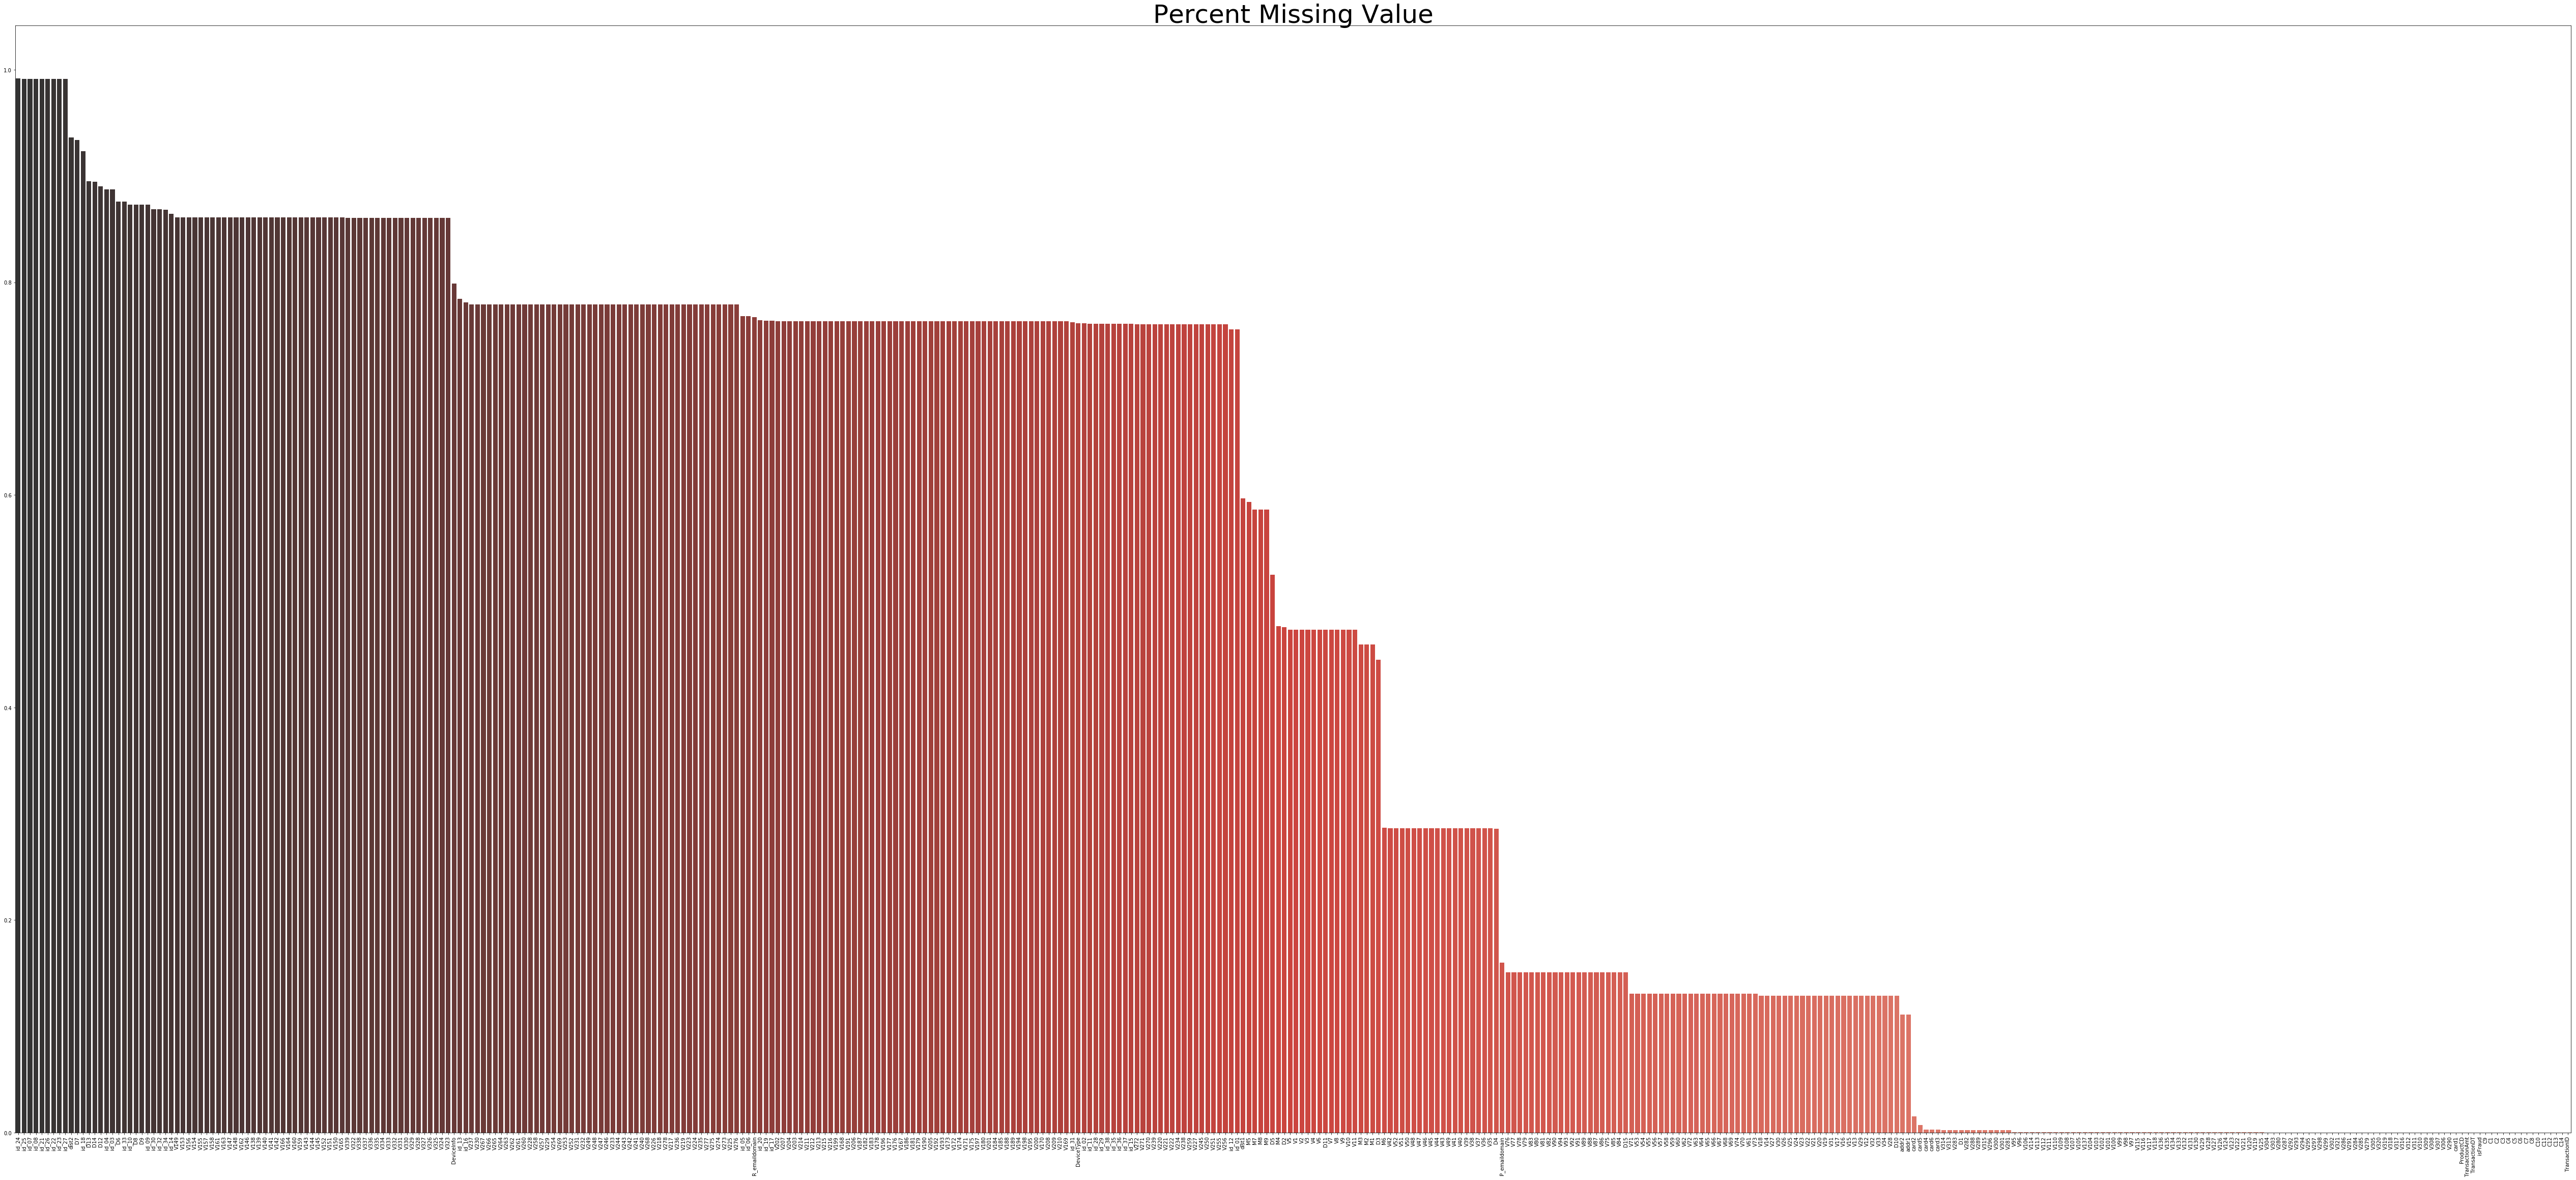

In [77]:
plt.figure(figsize=(90,40))
sns.barplot(y=train_full_df.isnull().sum().sort_values(ascending=False)/len(train_full_df),
            x=train_full_df.isnull().sum().sort_values(ascending=False).index,
            palette="Reds_d")
plt.title("Percent Missing Value",size=50)
plt.xticks(rotation=90)

In [78]:
columns_def=pd.DataFrame({"na_count":train_full_df.isnull().sum().sort_values(ascending=False)})

In [79]:
columns_def["per"]=columns_def["na_count"]/len(train_full_df)

In [80]:
range=[0.05, 0.10 ,0.15, 0.25, 0.40, 0.60, 0.75]

In [81]:
for i in range: 
    print (columns_def[columns_def["per"]<i].shape[0]/train_full_df.shape[1])

0.25806451612903225
0.25806451612903225
0.3686635944700461
0.41935483870967744
0.46543778801843316
0.5207373271889401
0.5207373271889401


In [82]:
limit=0.10

In [83]:
columns_final=columns_def[columns_def["per"]<limit].index 

train_full_df=train_full_df[train_full_df.columns.intersection(columns_final)]

In [84]:
train_full_df[train_full_df.select_dtypes(include=['object']).columns]

,ProductCD,card4,card6
0,W,discover,credit
1,W,mastercard,credit
2,W,visa,debit
3,W,mastercard,debit
4,H,mastercard,credit
5,W,visa,debit
6,W,visa,debit
7,W,visa,debit
8,H,visa,debit
9,W,mastercard,debit


In [85]:
card6_dummy_df=pd.get_dummies(train_full_df["card6"])

In [86]:
train_full_df.shape

(590540, 112)

In [87]:
train_full_df=pd.concat([train_full_df,card6_dummy_df],axis=1)

In [88]:
train_full_df=train_full_df._get_numeric_data()
train_full_df=train_full_df.dropna()

len(train_full_df[train_full_df["isFraud"]==1])/len(train_full_df)*100

3.46278261170406

## Select features for training

In [89]:
x_full_df=train_full_df.drop(["isFraud"],axis=1)
y_full_df=train_full_df["isFraud"]

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_full_df,y_full_df,test_size=0.50)

## LogisticRegression Model & Predict

In [91]:
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [92]:
lr = LogisticRegression(solver='lbfgs')  
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
lr.score(X_test, y_test)

0.965244166133301

In [94]:
y_pred=lr.predict(X_test)

In [95]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,278999,278999
1,10046,10046
All,289045,289045


In [96]:
recall_score(y_test, y_pred)

0.0

In [97]:
accuracy_score(y_test, y_pred)

0.965244166133301

In [98]:
recall_score(y_test, y_pred)

0.0